<a href="https://www.kaggle.com/code/parhamparham/dimension-reduction?scriptVersionId=126018668" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The purpose of this code is review types of dimension reductions in machine learning.

In [1]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import decimal


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


In [3]:
df = pd.read_csv("/kaggle/input/human-activity-recognition-with-smartphones/train.csv")

In [4]:
print(f"train shape: {df.shape}")


train shape: (7352, 563)


In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
list_of_activity = df["Activity"].unique().tolist() 
print(list_of_activity)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [7]:
X = df.drop(columns = "Activity")
print(X.shape)

(7352, 562)


In [8]:
y = df["Activity"]
print(y.shape)

(7352,)


In [9]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [10]:
X_train.shape

(5881, 562)

In [11]:
X_test.shape

(1471, 562)

In [12]:
GNB_classifer = GaussianNB()

In [13]:
fitted_GNB = GNB_classifer.fit(X_train, y_train)

In [14]:
y_predicted = fitted_GNB.predict(X_test)

In [15]:
y_predicted

array(['LAYING', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', ..., 'SITTING',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype='<U18')

In [16]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.6301835486063903


# Feature selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [18]:
feature_selection_f_classif_100 = SelectKBest(f_classif, k=100)
feature_selection_f_classif_200 = SelectKBest(f_classif, k=200)
feature_selection_f_classif_300 = SelectKBest(f_classif, k=300)
feature_selection_f_classif_400 = SelectKBest(f_classif, k=400)

In [19]:
X_feature_selection_f_classif_100 = feature_selection_f_classif_100.fit_transform(X, y)
X_feature_selection_f_classif_100.shape

(7352, 100)

In [20]:
X_feature_selection_f_classif_200 = feature_selection_f_classif_200.fit_transform(X, y)
X_feature_selection_f_classif_200.shape

(7352, 200)

In [21]:
X_feature_selection_f_classif_300 = feature_selection_f_classif_300.fit_transform(X, y)
X_feature_selection_f_classif_300.shape

(7352, 300)

In [22]:
X_feature_selection_f_classif_400 = feature_selection_f_classif_400.fit_transform(X, y)
X_feature_selection_f_classif_400.shape

(7352, 400)

In [23]:
X_train_100, X_test_100,y_train_100, y_test_100 = train_test_split(X_feature_selection_f_classif_100,y, test_size=0.2)

In [24]:
X_train_100.shape

(5881, 100)

In [25]:
X_test_100.shape

(1471, 100)

In [26]:
y_train_100.shape

(5881,)

In [27]:
y_test_100.shape

(1471,)

In [28]:
fitted_GNB_100 = GNB_classifer.fit(X_train_100, y_train_100)

In [29]:
y_predicted_100 = fitted_GNB_100.predict(X_test_100)

In [30]:
prediction_100 = accuracy_score(y_test_100, y_predicted_100)
print(prediction_100)

0.7770224337185588


In [31]:
X_train_200, X_test_200,y_train_200, y_test_200 = train_test_split(X_feature_selection_f_classif_200,y, test_size=0.2)
fitted_GNB_200 = GNB_classifer.fit(X_train_200, y_train_200)
y_predicted_200 = fitted_GNB_200.predict(X_test_200)
prediction_200 = accuracy_score(y_test_200, y_predicted_200)
print(prediction_200)

0.8531611148878314


In [32]:
X_train_300, X_test_300,y_train_300, y_test_300 = train_test_split(X_feature_selection_f_classif_300,y, test_size=0.2)
fitted_GNB_300 = GNB_classifer.fit(X_train_300, y_train_300)
y_predicted_300 = fitted_GNB_300.predict(X_test_300)
prediction_300 = accuracy_score(y_test_300, y_predicted_300)
print(prediction_300)

0.7307953772943576


In [33]:
X_train_400, X_test_400,y_train_400, y_test_400 = train_test_split(X_feature_selection_f_classif_400,y, test_size=0.2)
fitted_GNB_400 = GNB_classifer.fit(X_train_400, y_train_400)
y_predicted_400 = fitted_GNB_400.predict(X_test_400)
prediction_400 = accuracy_score(y_test_400, y_predicted_400)
print(prediction_400)

0.6961250849762066


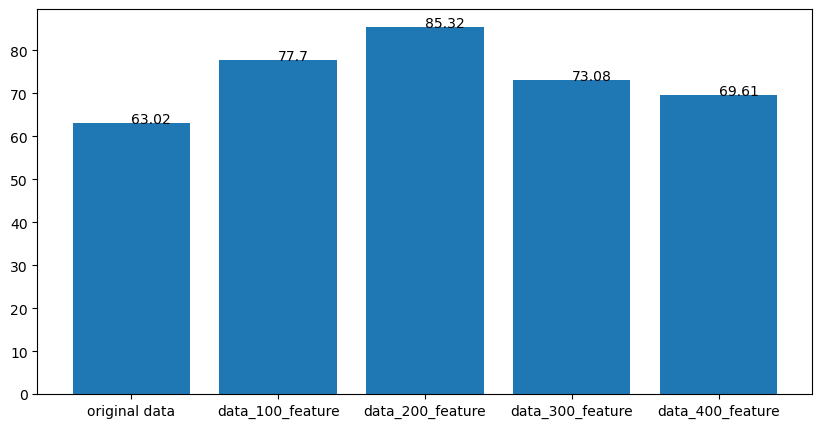

In [34]:
import matplotlib.pyplot as plt

execution = ("original data", 'data_100_feature','data_200_feature','data_300_feature','data_400_feature')
accuracy = [float(round(first_prediction*100,2)), float(round(prediction_100*100,2)), float(round(prediction_200*100,2)), float(round(prediction_300*100,2)), float(round(prediction_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()